In [1]:
from sklearn.utils import class_weight

from sklearn.model_selection import train_test_split
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# For the plots 
import matplotlib.pyplot as plt

# For controlling the training parameters in the midst of training itself
from keras.callbacks import ModelCheckpoint,EarlyStopping, ReduceLROnPlateau

# For creating directory to save the models
import os

Using TensorFlow backend.


In [2]:
# Load the data
X = np.load("X.npy")
Y = np.load("Y.npy")

In [3]:
# Split the test train and pass it into validation

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.05, random_state=42)

In [4]:
# Reshape the stuff according to the the shape Keras expects it to be !
data = X_train.reshape((X_train.shape[0], 100, 1))
target = Y_train.reshape((Y_train.shape[0], 1))

val_data = X_test.reshape(X_test.shape[0],100,1)
val_target = Y_test.reshape(Y_test.shape[0],1)

In [12]:
# The standard model
# Here 50, the dimensionality of the output from LSTM is just a random no and has no suxh signifance, 
# That ^^ shuould be search via a hyperparameter search

model = Sequential()

# The a<final output> will have 32 numbers 
model.add(LSTM(50, input_shape=(100, 1)))

# Get those 50 numbers and put that into one output !
model.add(Dense(1))

In [13]:
# Define the output for the saving the checkpoint (best models)

outputFolder = './output-lstm'
if not os.path.exists(outputFolder):
    os.makedirs(outputFolder)
filepath=outputFolder+"/Weights-{epoch:02d}-{val_acc:.2f}.hdf5"

In [14]:
# The callback function for model checkpoint saving
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1,save_best_only=True,\
                             save_weights_only=True,mode='auto')

# The callback function for earlystopping

earlystop = EarlyStopping(monitor='val_loss',patience=10, \
                          verbose=1, mode='auto')

# The callback function for reducing learning rate on plateus

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=3, min_lr=0.00001)

In [15]:
# Put all those calback in a list
callbacks = [earlystop, checkpoint, reduce_lr]

In [16]:
# I have decided to use mean_absolute_error , beacuse for some reason mean squared e
model.compile(loss='mean_absolute_error', optimizer='adam',metrics=['accuracy'])
model_info = model.fit(data, target, nb_epoch=10000, batch_size=1000, verbose=2,validation_data=(val_data,val_target),
                   callbacks=callbacks)

/home/sangeet/.local/lib/python3.5/site-packages/keras/models.py:944: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 3099 samples, validate on 164 samples
Epoch 1/10000

Epoch 00001: val_acc improved from -inf to 0.76829, saving model to ./output-lstm/Weights-01-0.77.hdf5
 - 1s - loss: 8.1608 - acc: 0.7331 - val_loss: 8.1755 - val_acc: 0.7683
Epoch 2/10000

Epoch 00002: val_acc did not improve
 - 1s - loss: 8.1522 - acc: 0.7331 - val_loss: 8.1705 - val_acc: 0.7683
Epoch 3/10000

Epoch 00003: val_acc did not improve
 - 1s - loss: 8.1508 - acc: 0.7331 - val_loss: 8.1653 - val_acc: 0.7683
Epoch 4/10000

Epoch 00004: val_acc did not improve
 - 1s - loss: 8.1457 - acc: 0.7331 - val_loss: 8.1619 - val_acc: 0.7683
Epoch 5/10000

Epoch 00005: val_acc did not improve
 - 1s - loss: 8.1455 - acc: 0.7331 - val_loss: 8.1620 - val_acc: 0.7683
Epoch 6/10000

Epoch 00006: val_acc did not improve
 - 1s - loss: 8.1444 - acc: 0.7331 - val_loss: 8.1614 - val_acc: 0.7683
Epoch 7/10000

Epoch 00007: val_acc did not improve
 - 1s - loss: 8.1440 - acc: 0.7331 - val_loss: 8.1606 - val_acc: 0.7683
Epoch 8/10000

Epoc

Epoch 66/10000

Epoch 00066: val_acc did not improve
 - 1s - loss: 8.1415 - acc: 0.7331 - val_loss: 8.1587 - val_acc: 0.7683
Epoch 67/10000

Epoch 00067: val_acc did not improve
 - 1s - loss: 8.1415 - acc: 0.7331 - val_loss: 8.1587 - val_acc: 0.7683
Epoch 68/10000

Epoch 00068: val_acc did not improve
 - 1s - loss: 8.1415 - acc: 0.7331 - val_loss: 8.1587 - val_acc: 0.7683
Epoch 69/10000

Epoch 00069: val_acc did not improve
 - 1s - loss: 8.1415 - acc: 0.7331 - val_loss: 8.1587 - val_acc: 0.7683
Epoch 70/10000

Epoch 00070: val_acc did not improve
 - 1s - loss: 8.1415 - acc: 0.7331 - val_loss: 8.1587 - val_acc: 0.7683
Epoch 71/10000

Epoch 00071: val_acc did not improve
 - 1s - loss: 8.1415 - acc: 0.7331 - val_loss: 8.1587 - val_acc: 0.7683
Epoch 72/10000

Epoch 00072: val_acc did not improve
 - 1s - loss: 8.1415 - acc: 0.7331 - val_loss: 8.1587 - val_acc: 0.7683
Epoch 73/10000

Epoch 00073: val_acc did not improve
 - 1s - loss: 8.1415 - acc: 0.7331 - val_loss: 8.1587 - val_acc: 0.7683


In [17]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

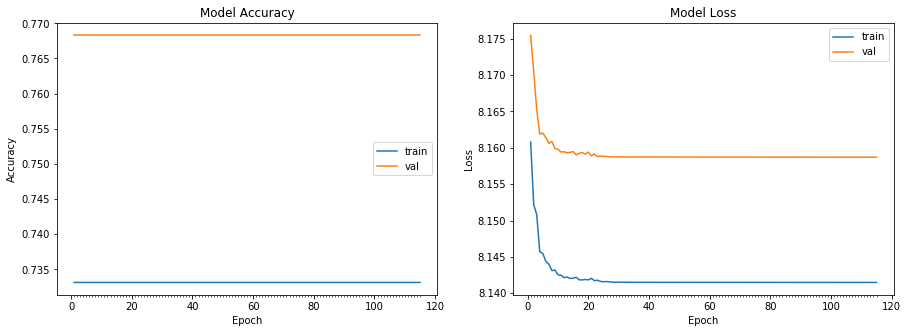

In [18]:
plot_model_history(model_info)